In [1]:
#########imports########

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import rasterio


In [2]:

Train_DIR = r"C:\Users\monsur\Desktop\LabelNoisePerformanceonWaterBodySegmentation\Dataset"
Valid_DIR = r"C:\Users\monsur\Desktop\LabelNoisePerformanceonWaterBodySegmentation\Dataset\valid"
Test_DIR = r"C:\Users\monsur\Desktop\LabelNoisePerformanceonWaterBodySegmentation\Dataset\test"




In [3]:
x_train_dir = os.path.join(Train_DIR, 'Band')
y_train_dir = os.path.join(Train_DIR, 'Label')

x_valid_dir = os.path.join(Valid_DIR, 'Band')
y_valid_dir = os.path.join(Valid_DIR, 'Label')

#x_valid_dir = os.path.join(DATA_DIR, '2017_Band2_Cropped')
#y_valid_dir = os.path.join(DATA_DIR, '2017_Label_Cropped')

x_test_dir = os.path.join(Test_DIR, 'Band')
y_test_dir = os.path.join(Test_DIR, 'Label')
print(x_train_dir)

C:\Users\monsur\Desktop\LabelNoisePerformanceonWaterBodySegmentation\Dataset\Band


In [4]:

ids = os.listdir(x_train_dir)
images_fps = [os.path.join(x_train_dir, image_id) for image_id in ids]
print(len(images_fps))

60


In [5]:
# def visualize(**images):
#     n = len(images)
    
#     print(n)
#     plt.figure(figsize=(12, 12))
#     for i, (name, image) in enumerate(images.items()):
#         print(name)
#         plt.subplot(1, n, i + 1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.title(' '.join(name.split('_')).title())
        
# #         image = image - image.min()
# #         image = image / image.max()
# #         image = 255 * image
        
# #         image = image.astype(np.uint8)
#         plt.imshow(image)
#         #print(image)
#         #plt.savefig("img{}.jpg".format(n))
#     plt.show()
    

In [6]:
def visualize(image,ground_truth,ids):
    fig = plt.figure(figsize=(10, 7)) 
  
    # setting values to rows and column variables 
    rows = 1
    columns = 2
  
    # reading images 
    Image1 = image
    Image2 = ground_truth
  
    # Adds a subplot at the 1st position 
    fig.add_subplot(rows, columns, 1) 
  
    # showing image 
    plt.imshow(Image1) 
    plt.axis('off') 
    plt.title(ids) 
  
    # Adds a subplot at the 2nd position 
    fig.add_subplot(rows, columns, 2) 
  
    # showing image 
    plt.imshow(Image2) 
    plt.axis('off') 
    plt.title(ids) 

In [7]:
# def visualize(image,ground_truth):
#     print("ids is : ",ids)
#     #plt.figure(figsize=(12,12))
#     plt.subplots(1,2)
#     plt.xticks([])
#     plt.yticks([])
# #     plt.title(ids)
#     plt.imshow(image)
#     #plt.title("ground")
#     plt.imshow(ground_truth)
#     plt.show()
# #     axarr[1,0].imshow(image_datas[2])
# #     axarr[1,1].imshow(image_datas[3])

In [8]:
def visualizeandsave(images,ground_truth,ids):
    fig = plt.figure(figsize=(10, 7)) 
  
    # setting values to rows and column variables 
    rows = 1
    columns = 2
  
    # reading images 
    Image1 = image
    Image2 = ground_truth
  
    # Adds a subplot at the 1st position 
    fig.add_subplot(rows, columns, 1) 
  
    # showing image 
    plt.imshow(Image1) 
    plt.axis('off') 
    plt.title(ids) 
  
    # Adds a subplot at the 2nd position 
    fig.add_subplot(rows, columns, 2) 
  
    # showing image 
    plt.imshow(Image2) 
    plt.axis('off') 
    plt.title(ids) 

In [9]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset

In [10]:
class Dataset(BaseDataset):
    
    
    CLASSES = ['nonwaterbody','waterbody']
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]
        
        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
        #print(self.class_values)
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read data
        #image= io.imread(self.images_fps[i])
        
        
        
        
        image = rasterio.open(self.images_fps[i], "r")
        image = image.read()
        #print(image.shape)
        
        
        image = np.transpose(image, [1,2,0])
        #print(image.shape)    #(192,192,3)

        #print(image.min())    # 293.1
        #print(image.max())    # 4399.8
        #print(image.dtype)    # float32

        #plt.imshow(image)     #shows all white, as expected

        #way to transform a float32bit tif image using - https://gis.stackexchange.com/questions/143584/convert-a-tiff-float32-image-to-8bit-tif-or-jpeg-image-using-gdal-and-python

        # an attempt to understand the image in rgb uint8, but careful using this technique, may not be appropriate
        image = image - image.min()
        image = image / image.max()
        image = 255 * image
        image = image.astype(np.uint8)
        
        
        
        
        
        
        
        
        
        
        #image = cv2.imread(self.images_fps[i])
        #image = cv2.cvtColor(image.astype('uint8') * 255, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = io.imread(self.masks_fps[i], 0)
        #print(image.shape)
        # extract certain classes from mask (e.g. cars)
#         mask[mask<128] = 0 # For diffused boudnaries
#         mask[mask>=128] = 1

        masks = [(mask == v) for v in self.class_values]
        #masks = mask
        mask = np.stack(masks, axis=-1).astype('float')
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = image, sample['mask']
            #image, mask= sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing( image=image,mask=mask)
            image, mask = sample['image'], sample['mask']
        #print(mask.shape) 
        return image, mask
        
    def __len__(self):
        
        return len(self.ids)


C:\Users\monsur\miniconda3\envs\monsur\lib\site-packages\rasterio\__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


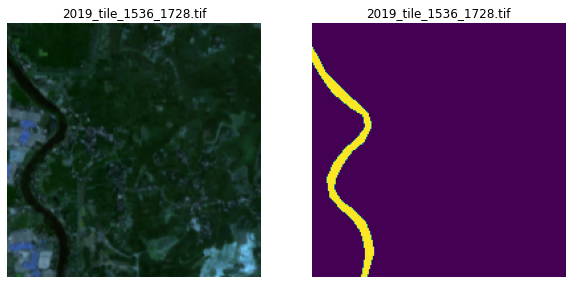

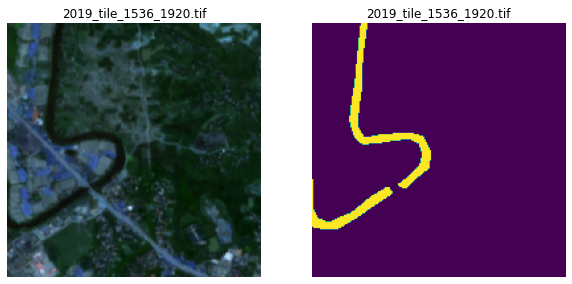

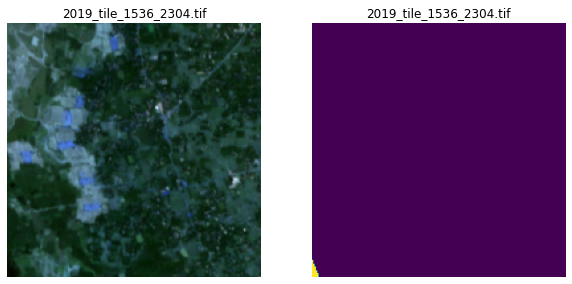

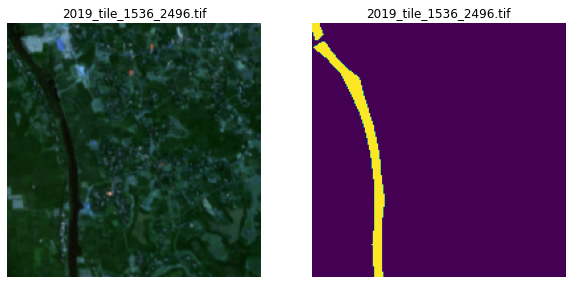

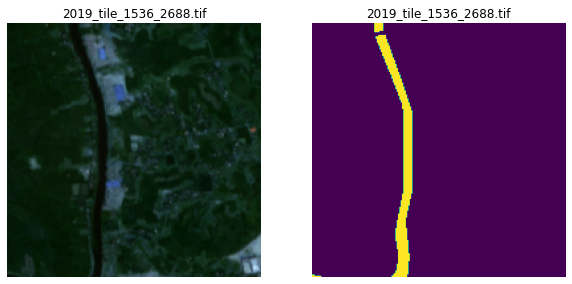

In [11]:
# dataset = Dataset(x_train_dir, y_train_dir, classes=['waterbody'])
# print(len(dataset))

# image, mask = dataset[250] # get some sample
# visualize(
#     image=image, 
#     cars_mask=mask.squeeze(),
# )

dataset = Dataset(x_train_dir, y_train_dir,classes=['waterbody'])
#print(len(dataset))

# image, mask = dataset[69] # get some sample
# visualize(
#     image=image, 
#     cars_mask=mask.squeeze(),
# )
# dataset

for i in range(5):
    num = 20+i
    image,mask = dataset[num]
    visualize(
        
        image = image,
        ground_truth= mask.squeeze(),
        ids=ids[num]
    )

In [12]:
import torch
import numpy as np
import segmentation_models_pytorch as smp


In [13]:
ENCODER = 'se_resnext50_32x4d'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['waterbody']
ACTIVATION = 'sigmoid' # could be None for logits or 'softmax2d' for multicalss segmentation
DEVICE = 'cuda'

# create segmentation model with pretrained encoder
model = smp.DeepLabV3(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES), 
    activation=ACTIVATION,
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

In [14]:

##Horizontal Flip and Vertical Flip works just fine. just need to set probability to 1 




import albumentations as albu
albumvalue=96
def get_training_augmentation():
    train_transform = [
        
        albu.HorizontalFlip(p=0.5),
#        albu.VerticalFlip(p=0.5),

#          albu.ShiftScaleRotate (shift_limit=0, scale_limit=0, rotate_limit=(20,20), interpolation=1, 
#                                 border_mode=None, value=None, mask_value=None, shift_limit_x=None, shift_limit_y=None, 
#                                 always_apply=False, p=1), 

#         albu.PadIfNeeded(min_height=albumvalue, min_width=albumvalue, always_apply=True, border_mode=0),
#         albu.RandomCrop(height=albumvalue, width=albumvalue, always_apply=True),
#          albu.Rotate(limit=10, interpolation=0, border_mode=0, always_apply=True, p=0.5),
#           albu.IAAAdditiveGaussianNoise (loc=10, scale=(2.5500000000000003, 12.75), per_channel=False, always_apply=False, p=0.5)
#         albu.IAAAdditiveGaussianNoise(p=0.5),
#          albu.GaussNoise (var_limit=(50, 100), mean=0, always_apply=False, p=0.5),
#         albu.IAAPerspective(p=0.5),

#         albu.OneOf(
#             [
#                 albu.CLAHE(p=1),
#                 albu.RandomBrightness(p=1),
#                 albu.RandomGamma(p=1),
#             ],
#             p=0.9,
#         ),

#         albu.OneOf(
#             [
#                 albu.IAASharpen(p=1),
#                 albu.Blur(blur_limit=3, p=1),
#                 albu.MotionBlur(blur_limit=3, p=1),
#             ],
#             p=0.9,
#         ),

#         albu.OneOf(
#             [
#                 albu.RandomContrast(p=1),
#                 albu.HueSaturationValue(p=1),
#             ],
#             p=0.9,
#         ),
    ]
    return albu.Compose(train_transform)


def get_validation_augmentation():
    
    test_transform = [
        albu.PadIfNeeded(albumvalue, albumvalue)
    ]
    return albu.Compose(test_transform)


def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn):
    
    
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)


In [15]:
augmented_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    augmentation=get_training_augmentation(), 
    classes=['waterbody'],
)

# same image with different random transforms
# for i in range(10):
#     image, mask = augmented_dataset[20]
#     visualize(image=image, mask=mask.squeeze(),ids=ids[10])

In [16]:
train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    augmentation=get_training_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=0)

In [17]:
from segmentation_models_pytorch import utils as u
import torch
from segmentation_models_pytorch.base.modules import Activation
import torch.nn.functional as F

def _take_channels(*xs, ignore_channels=None):
    if ignore_channels is None:
        return xs
    else:
        channels = [channel for channel in range(xs[0].shape[1]) if channel not in ignore_channels]
        xs = [torch.index_select(x, dim=1, index=torch.tensor(channels).to(x.device)) for x in xs]
        return xs


def _threshold(x, threshold=None):
    if threshold is not None:
        return (x > threshold).type(x.dtype)
    else:
        return x



# def tversky(pr,
#             gt,
#             eps=1e-7,
#             alpha=0.8,
#             beta=2,
#             threshold=None,
#             ignore_channels=None):
#     """Calculate tversky cofficient between ground truth and prediction
#     Args:
#         pr (torch.Tensor): predicted tensor
#         gt (torch.Tensor):  ground truth tensor
#         eps (float): epsilon to avoid zero division
#         threshold: threshold for outputs binarization
#     Returns:
#         float: dice score
#     """
#     pr = _threshold(pr, threshold=threshold)
#     pr, gt = _take_channels(pr, gt, ignore_channels=ignore_channels)

#     tp = torch.sum(gt * pr)
#     fp = torch.sum(pr) - tp
#     fn = torch.sum(gt) - tp

#     tversky = (tp + eps) / (tp + alpha * fn + beta * fp + eps)
#     return tversky


class TverskyLoss(u.base.Loss):
    def __init__(self,
                 eps=1.,
                 activation=None,
                 alpha=0.5,
                 beta=0.5,
                 ignore_channles=None,
                 **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
        self.activation = Activation(activation)
        self.alpha = alpha
        self.beta = beta
        self.ignore_channels = ignore_channles

    def forward(self, y_pr, y_gt):
        return 1 - tversky(
            y_pr,
            y_gt,
            eps=self.eps,
            threshold=None,
            alpha=self.alpha,
            beta=self.beta,
            ignore_channels=self.ignore_channels,
        )

def focal_loss(inputs,targets,alpha,gamma,threshold,ignore_channels):
    #inputs = F.sigmoid(inputs)       
        
    #flatten label and prediction tensors
    #inputs = inputs.view(-1)
    #targets = targets.view(-1)
    
    inputs = _threshold(inputs, threshold=threshold)
    inputs, targets = _take_channels(inputs,targets, ignore_channels=ignore_channels)
        
    #first compute binary cross-entropy 
    BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
    BCE_EXP = torch.exp(-BCE)
    focal_loss = alpha * (1-BCE_EXP)**gamma * BCE
    return focal_loss
    
class FocalLoss(u.base.Loss):
    def __init__(self,
                 eps=1.,
                 activation=None,
                 alpha=0.8,
                 gamma=2,
                 ignore_channles=None,
                 **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
        self.activation = Activation(activation)
        self.alpha = alpha
        self.gamma = gamma
        self.ignore_channels = ignore_channles

    def forward(self, inputs, targets, alpha=0.8, gamma=2, smooth=1,threshold=None,ignore_channels=None):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        focal= focal_loss(inputs,targets,alpha,gamma,threshold,ignore_channels)
                       
        return focal






In [18]:
# Dice/F1 score - https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient
# IoU/Jaccard score - https://en.wikipedia.org/wiki/Jaccard_index

loss = FocalLoss(eps=1.0,
    activation=None,) 

# loss = TverskyLoss(eps=1.0,
#     activation=None,) 
metrics = [
    smp.utils.metrics.Accuracy(threshold=0.5),
    smp.utils.metrics.IoU(threshold=0.5),
    smp.utils.metrics.Fscore(threshold=0.5),
    smp.utils.metrics.Precision(threshold=0.5),
    smp.utils.metrics.Recall(threshold=0.5),
    
]

optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.0001),
])

In [19]:
# create epoch runners 
# it is a simple loop of iterating over dataloader`s samples
train_epoch = smp.utils.train.TrainEpoch(
    model=model,
    metrics=metrics,
    loss=loss,  
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    metrics=metrics, 
    loss=loss, 
    device=DEVICE,
    verbose=True,
)
#print(model)

In [20]:
# train model for 40 epochs

max_score = 0
epochnum=[]
trainiouscores=[]
traindiceloss=[]
trainfscore=[]
trainprecisions=[]
trainrecalls=[]
trainaccuracy=[]

validiouscores=[]
validdiceloss=[]
validfscore=[]
validprecisions=[]
validrecalls=[]
validaccuracy=[]

for i in range(0, 20):
    
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    
    epochnum.append(i)
    
    ###Train Scores
    trainiouscores.append(train_logs['iou_score'])
    traindiceloss.append(train_logs['focal_loss'])
    trainfscore.append(train_logs['fscore'])
    trainprecisions.append(train_logs['precision'])
    trainrecalls.append(train_logs['recall'])
    trainaccuracy.append(train_logs['accuracy'])
    
    ###Valid Scores
    validiouscores.append(valid_logs['iou_score'])
    validdiceloss.append(valid_logs['focal_loss'])
    validfscore.append(valid_logs['fscore'])
    validprecisions.append(valid_logs['precision'])
    validrecalls.append(valid_logs['recall'])
    validaccuracy.append(valid_logs['accuracy'])
    
    
    # do something (save model, change lr, etc.)
    if max_score < valid_logs['accuracy']:
        max_score = valid_logs['accuracy']
        torch.save(model, './best_model.pth')
        print('Model saved!')
        
    if i == 20:
        optimizer.param_groups[0]['lr'] = 1e-5
        print('Decrease decoder learning rate to 1e-5!')


Epoch: 0
train:   0%|                                                                                    | 0/15 [00:00<?, ?it/s]

C:\Users\monsur\miniconda3\envs\monsur\lib\site-packages\rasterio\__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


train: 100%|█| 15/15 [00:07<00:00,  2.13it/s, focal_loss - 0.1132, accuracy - 0.6592, iou_score - 0.05695, fscore - 0.1
valid: 100%|█| 24/24 [00:01<00:00, 19.06it/s, focal_loss - 0.1778, accuracy - 0.1215, iou_score - 0.05023, fscore - 0.0
Model saved!

Epoch: 1
train: 100%|█| 15/15 [00:05<00:00,  2.67it/s, focal_loss - 0.08145, accuracy - 0.7842, iou_score - 0.1019, fscore - 0.1
valid: 100%|█| 24/24 [00:01<00:00, 17.98it/s, focal_loss - 0.1564, accuracy - 0.5251, iou_score - 0.06905, fscore - 0.1
Model saved!

Epoch: 2
train: 100%|█| 15/15 [00:05<00:00,  2.73it/s, focal_loss - 0.063, accuracy - 0.8396, iou_score - 0.1149, fscore - 0.190
valid: 100%|█| 24/24 [00:01<00:00, 18.88it/s, focal_loss - 0.1312, accuracy - 0.6693, iou_score - 0.08224, fscore - 0.1
Model saved!

Epoch: 3
train: 100%|█| 15/15 [00:05<00:00,  2.66it/s, focal_loss - 0.04607, accuracy - 0.8895, iou_score - 0.1336, fscore - 0.2
valid: 100%|█| 24/24 [00:01<00:00, 18.90it/s, focal_loss - 0.1069, accuracy - 0.7941, iou_s

In [21]:
print(trainaccuracy)

[0.6592018485069275, 0.7841896375020344, 0.8396222313245137, 0.8895078380902608, 0.921371348698934, 0.9436925848325095, 0.9509801944096883, 0.9552806814511616, 0.9532773733139038, 0.9572722315788269, 0.9577442367871603, 0.955216932296753, 0.9595314383506776, 0.9575389782587685, 0.9586633880933126, 0.9554737329483034, 0.9546906709671021, 0.957893431186676, 0.9583582043647766, 0.9573260426521301]


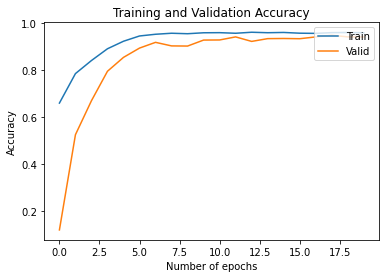

In [22]:
plt.plot(epochnum, trainaccuracy) 
plt.plot(epochnum,validaccuracy)
  
# naming the x axis 
plt.xlabel('Number of epochs') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Training and Validation Accuracy') 
plt.legend(["Train","Valid"],loc ="upper right")
plt.savefig("Training and Validation Accuracy.jpg")
# function to show the plot 
plt.show() 


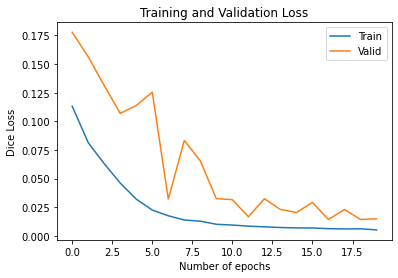

In [23]:
plt.plot(epochnum, traindiceloss) 
plt.plot(epochnum,validdiceloss)
# naming the x axis 
plt.xlabel('Number of epochs') 
# naming the y axis 
plt.ylabel('Dice Loss') 
  
# giving a title to my graph 
plt.title('Training and Validation Loss') 
plt.legend(["Train","Valid"],loc ="upper right")  

plt.savefig("Training and Validation Loss.jpg")
# function to show the plot 
plt.show() 

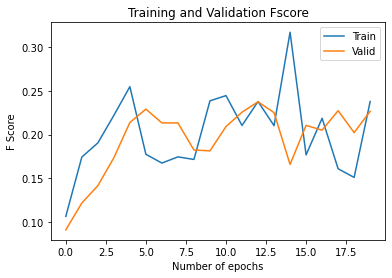

In [24]:
plt.plot(epochnum, trainfscore) 
plt.plot(epochnum,validfscore)  
# naming the x axis 
plt.xlabel('Number of epochs') 
# naming the y axis 
plt.ylabel('F Score') 
  
# giving a title to my graph 
plt.title('Training and Validation Fscore') 
plt.legend(["Train","Valid"],loc ="upper right")  
plt.savefig("Training and Validation Fscore.jpg")

# function to show the plot 
plt.show() 

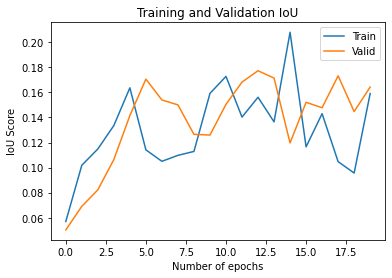

In [25]:
plt.plot(epochnum, trainiouscores) 
plt.plot(epochnum,validiouscores)  
# naming the x axis 
plt.xlabel('Number of epochs') 
# naming the y axis 
plt.ylabel('IoU Score') 
  
# giving a title to my graph 
plt.title('Training and Validation IoU') 
plt.legend(["Train","Valid"],loc ="upper right")  
plt.savefig("Training and Validation IoU.jpg")
# function to show the plot 
plt.show() 

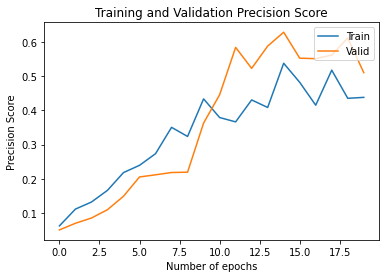

In [26]:
plt.plot(epochnum, trainprecisions) 
plt.plot(epochnum,validprecisions)  
# naming the x axis 
plt.xlabel('Number of epochs') 
# naming the y axis 
plt.ylabel('Precision Score') 
  
# giving a title to my graph 
plt.title('Training and Validation Precision Score') 
plt.legend(["Train","Valid"],loc ="upper right")  
plt.savefig("Training and Validation Precision Score.jpg")
# function to show the plot 
plt.show() 

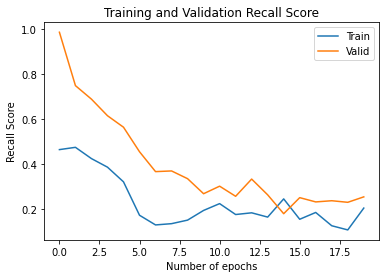

In [27]:
plt.plot(epochnum, trainrecalls) 
plt.plot(epochnum,validrecalls)  
# naming the x axis 
plt.xlabel('Number of epochs') 
# naming the y axis 
plt.ylabel('Recall Score') 
  
# giving a title to my graph 
plt.title('Training and Validation Recall Score') 
plt.legend(["Train","Valid"],loc ="upper right")  
plt.savefig("Training and Validation Recall Score.jpg")
# function to show the plot 
plt.show() 

In [28]:
best_model = torch.load('./best_model.pth')

In [29]:
test_dataset = Dataset(
    x_test_dir, 
    y_test_dir, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

test_dataloader = DataLoader(test_dataset)

In [30]:
# image,mask = test_dataset[61]
# visualize(
#     image = image,
#     ground_truthlabel = mask.squeeze()
# )

In [31]:
test_epoch = smp.utils.train.ValidEpoch(
    model=best_model.cuda(),
    loss=loss.cuda(),
    metrics=metrics,
    device=DEVICE,
)
testaccuracy=[]
logs = test_epoch.run(test_dataloader)
testaccuracy.append(logs['accuracy'])
print(testaccuracy)

valid: 100%|█| 28/28 [00:01<00:00, 18.44it/s, focal_loss - 0.008339, accuracy - 0.9435, iou_score - 0.07196, fscore - 0
[0.9435289289270128]


In [32]:
test_dataset_vis = Dataset(
    x_test_dir, y_test_dir, 
    classes=CLASSES,
)


test_temp_dataset = Dataset(
    x_test_dir, 
    y_test_dir, 
    #augmentation=get_validation_augmentation(), 
    #preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

In [33]:
def test_visualize(**images):
    n = len(images)
    plt.figure(figsize=(40, 40))
    figure = plt.gcf()

    figure.set_size_inches(18,9)
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        
#         image = image - image.min()
#         image = image / image.max()
#         image = 255 * image
        
#         image = image.astype(np.uint8)
        plt.imshow(image)
        #print(image)
        plt.savefig("img{}.jpg".format(n),dpi=100,bbox_inches="tight")
    plt.show()

In [34]:
def test_visualizeandsave(image,ground_truth,predicted_mask,ids):
    fig = plt.figure(figsize=(10, 7)) 
  
    # setting values to rows and column variables 
    rows = 1
    columns = 3
  
    # reading images 
    Image1 = image
    Image2 = ground_truth
    Image3=predicted_mask
  
    # Adds a subplot at the 1st position 
    fig.add_subplot(rows, columns, 1) 
  
    # showing image 
    plt.imshow(Image1) 
    plt.axis('off') 
    plt.title(ids) 
  
    # Adds a subplot at the 2nd position 
    fig.add_subplot(rows, columns, 2) 
  
    # showing image 
    plt.imshow(Image2) 
    plt.axis('off') 
    plt.title(ids) 
    
    fig.add_subplot(rows, columns, 3) 
  
    # showing image 
    plt.imshow(Image3) 
    plt.axis('off') 
    plt.title(ids)
    temppath='C:/Users/WC/RRnProject/EX/ex_pred/'
    imname=str(ids)
    impath=os.path.join(temppath, imname)
    
    cv2.imwrite(impath,Image3)

In [35]:
testids = os.listdir(x_test_dir)

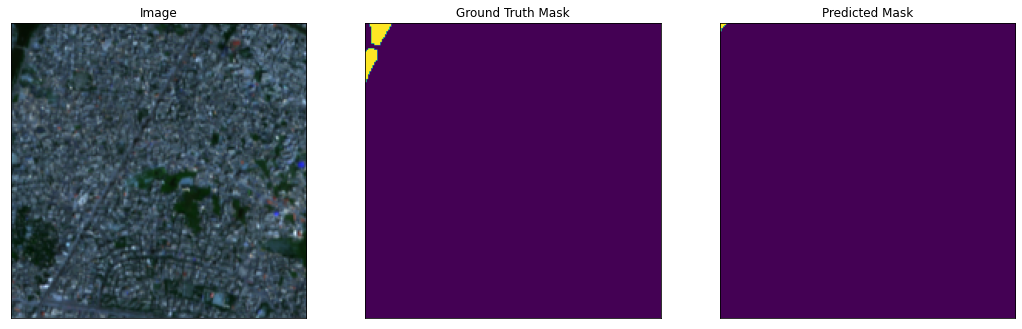

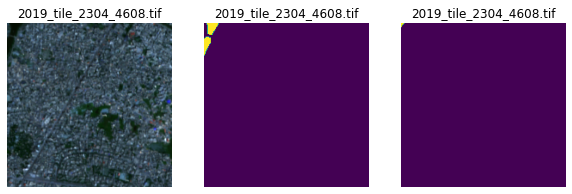

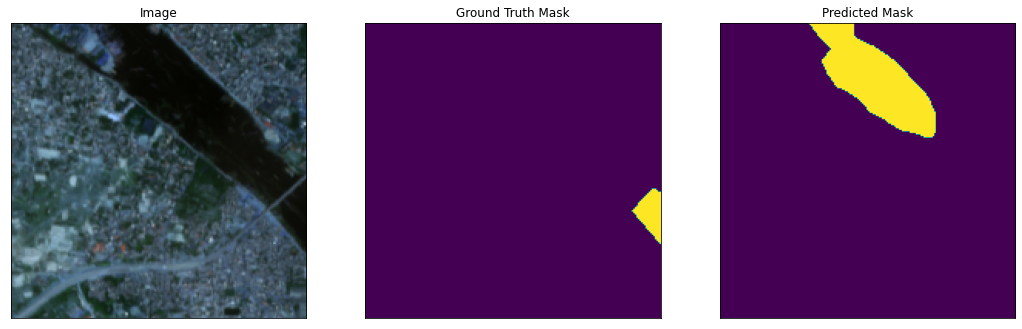

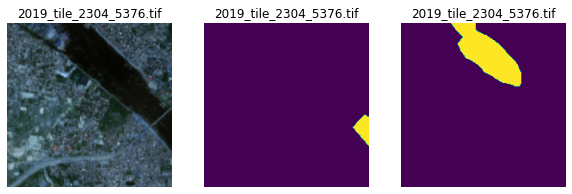

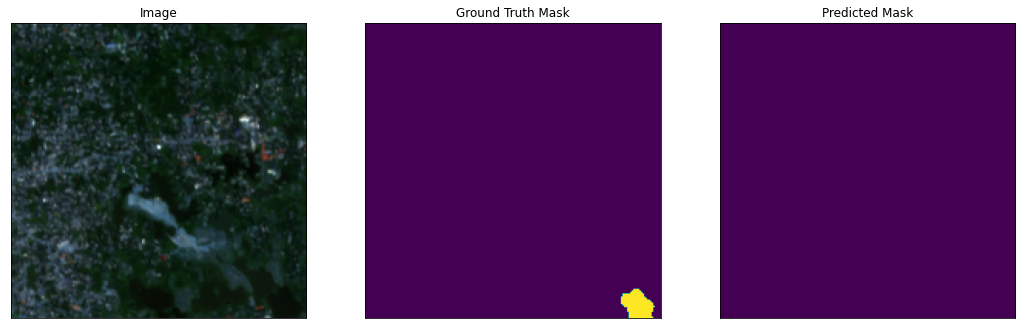

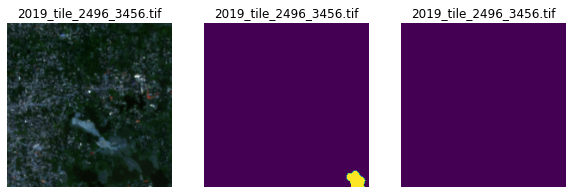

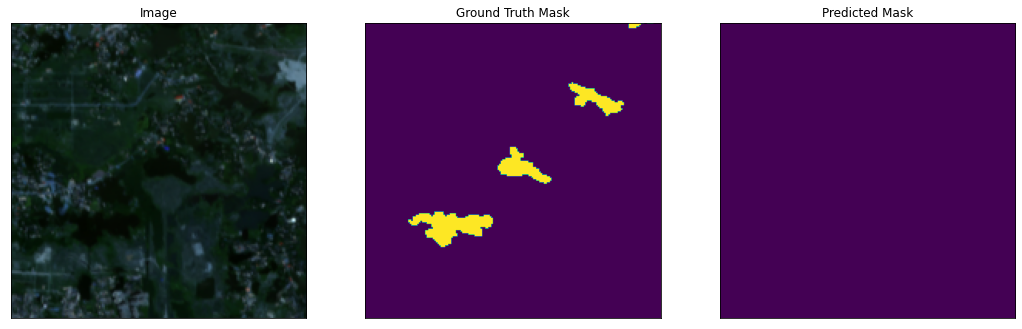

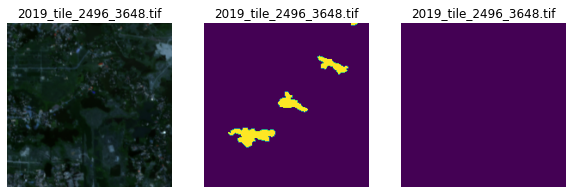

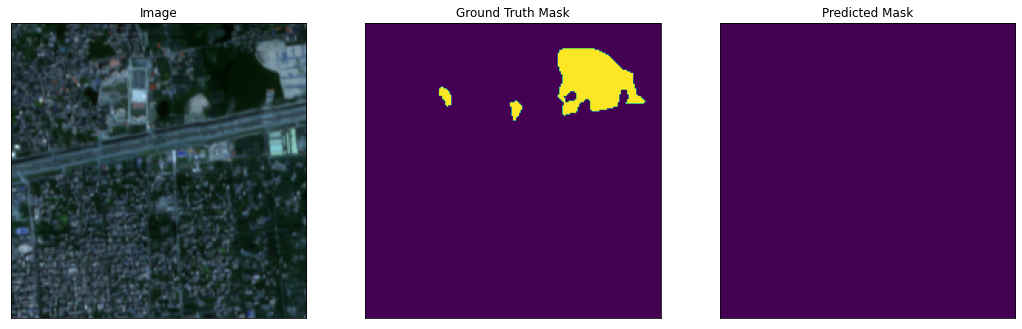

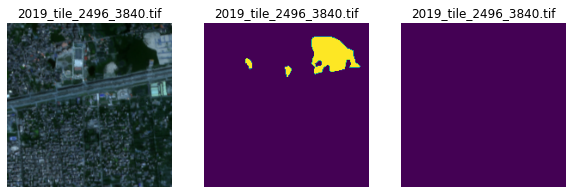

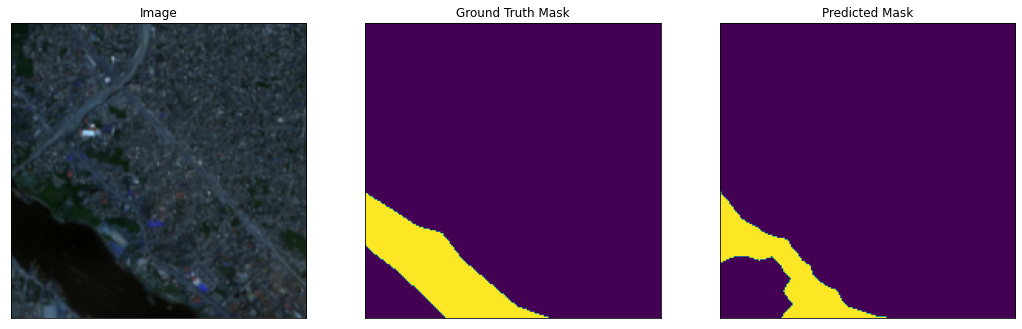

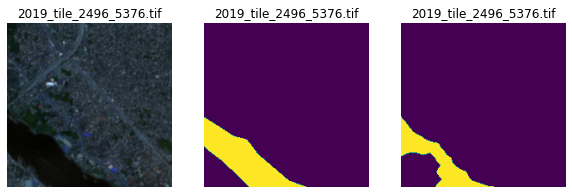

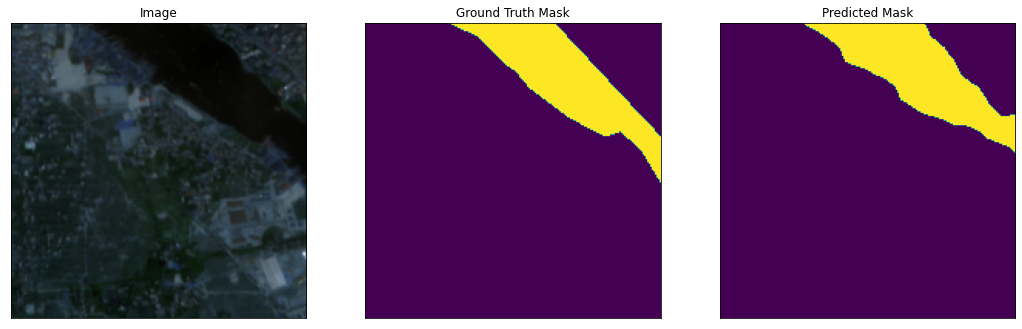

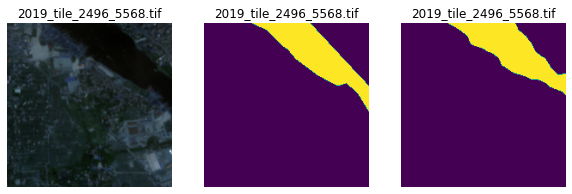

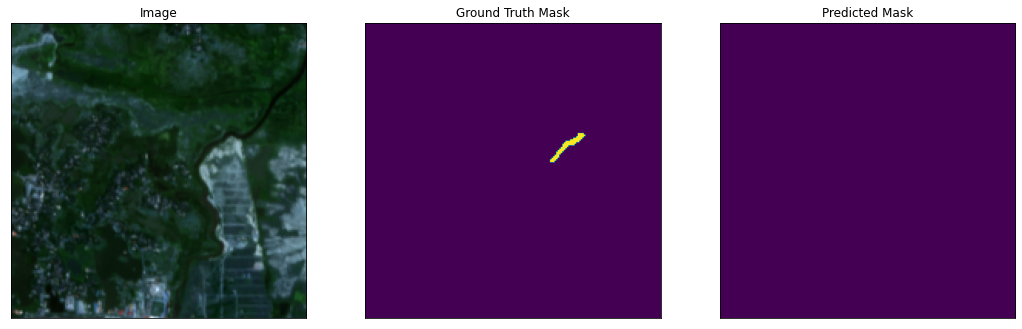

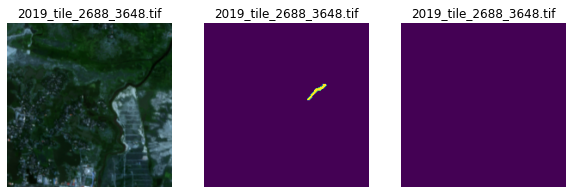

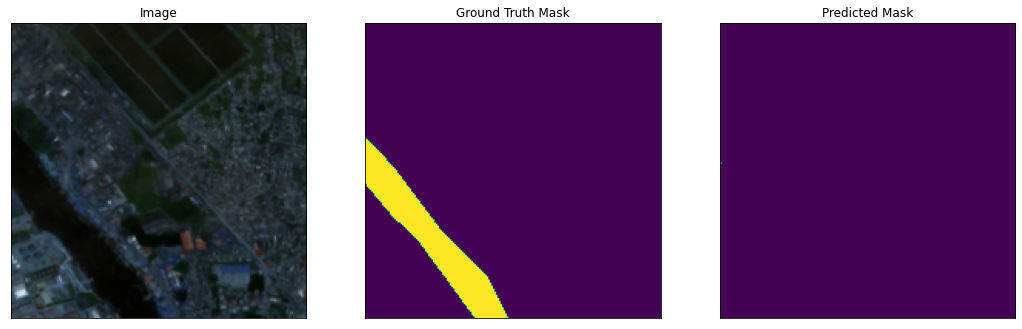

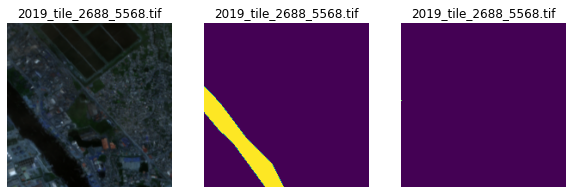

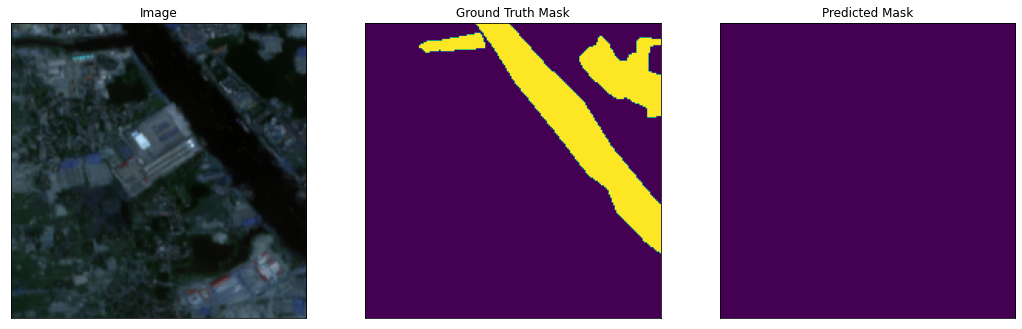

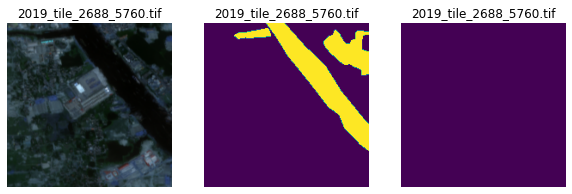

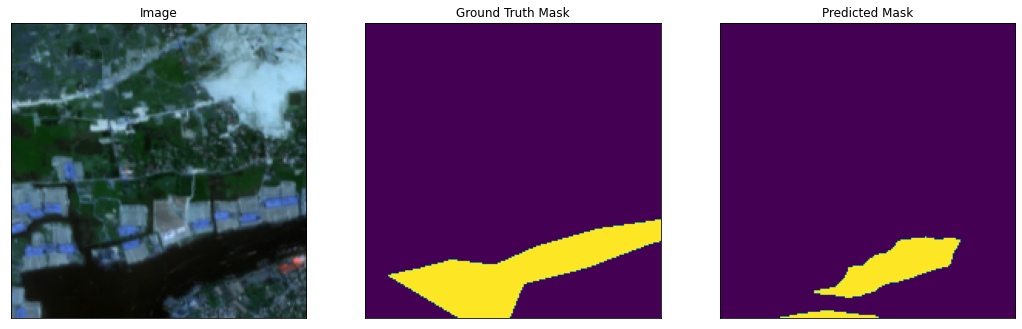

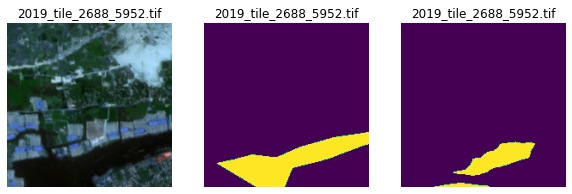

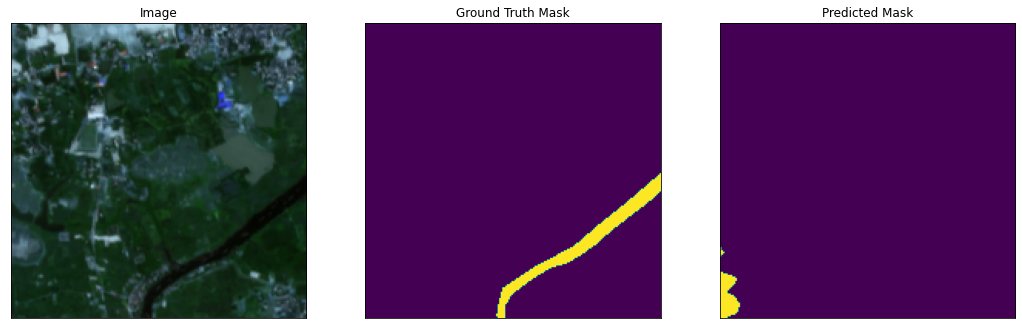

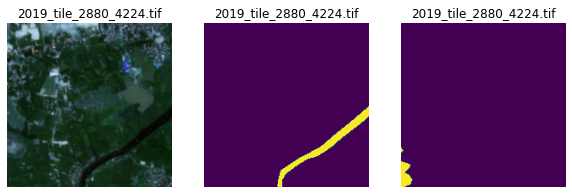

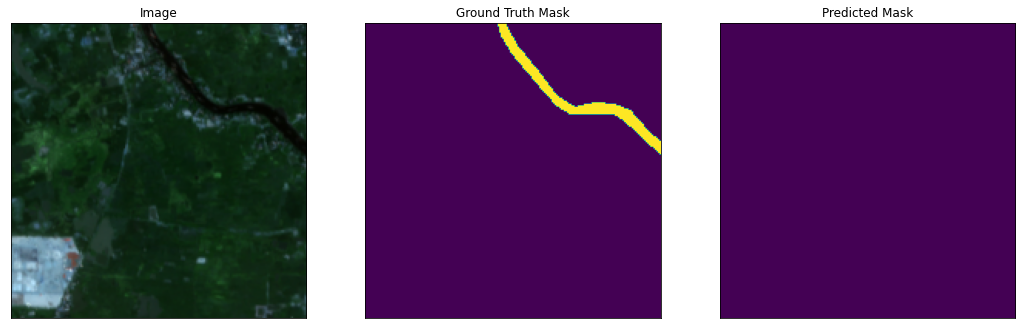

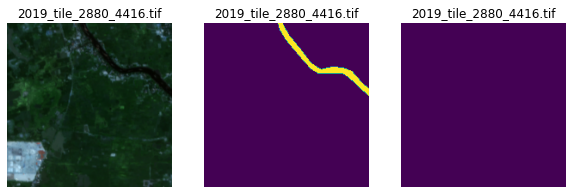

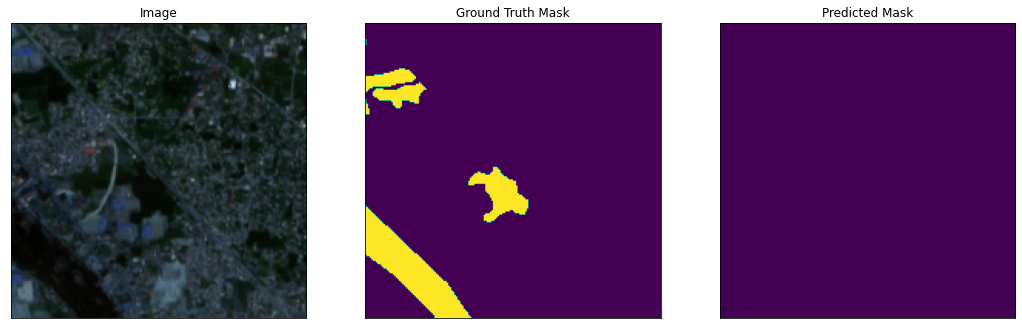

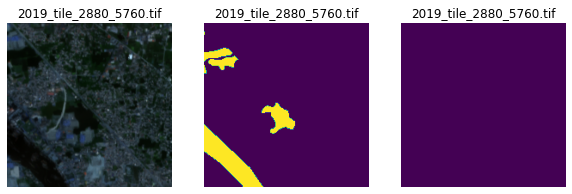

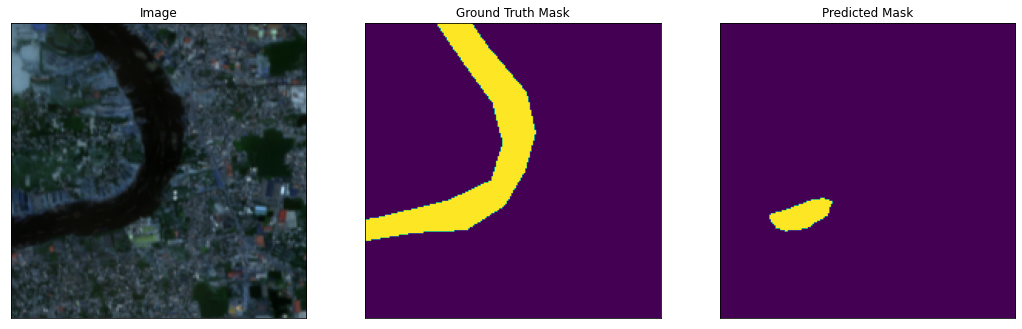

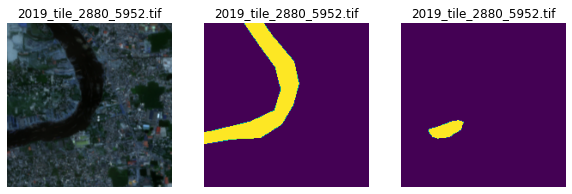

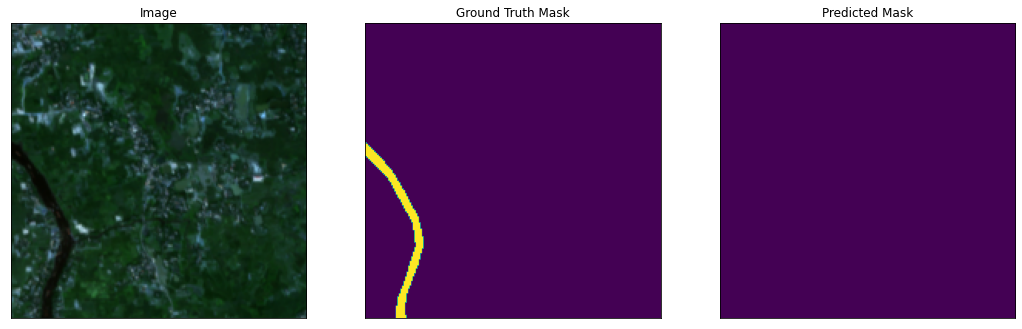

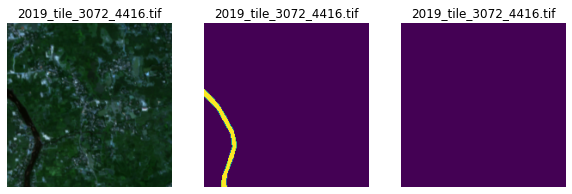

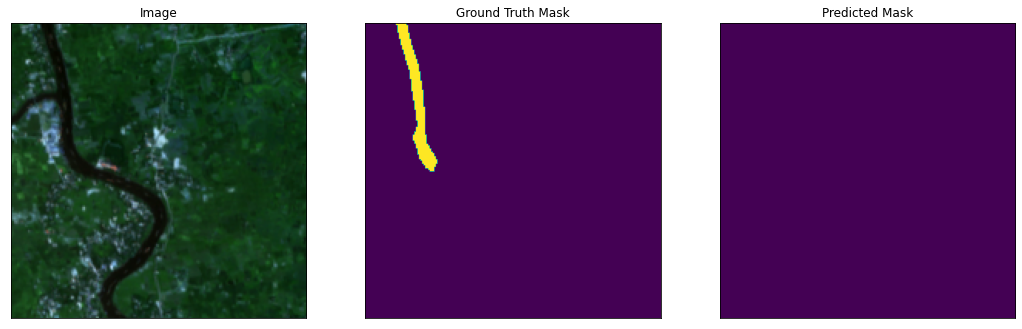

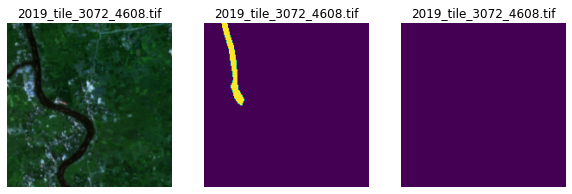

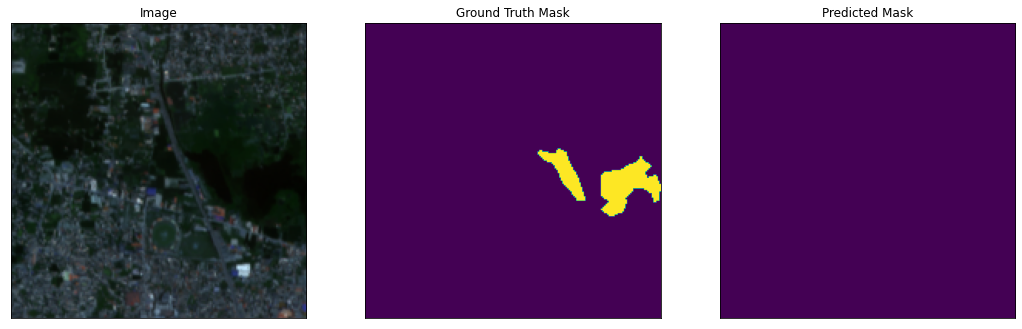

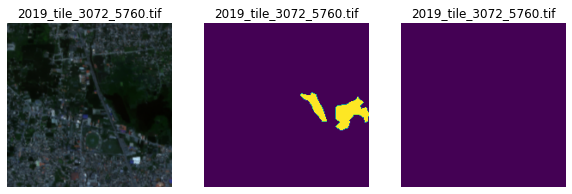

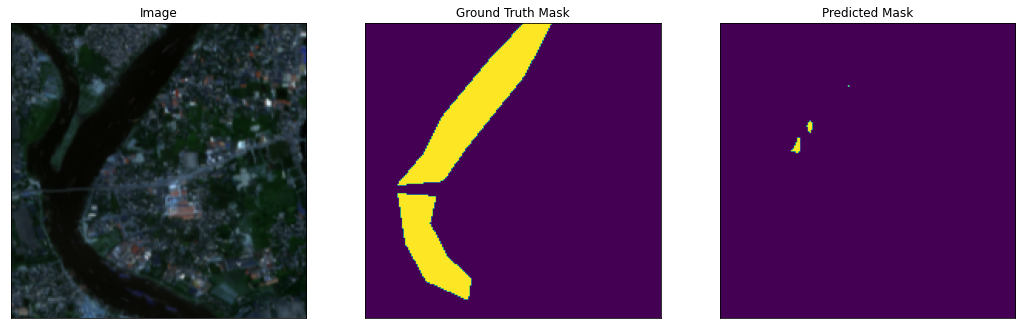

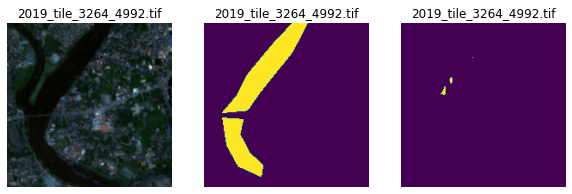

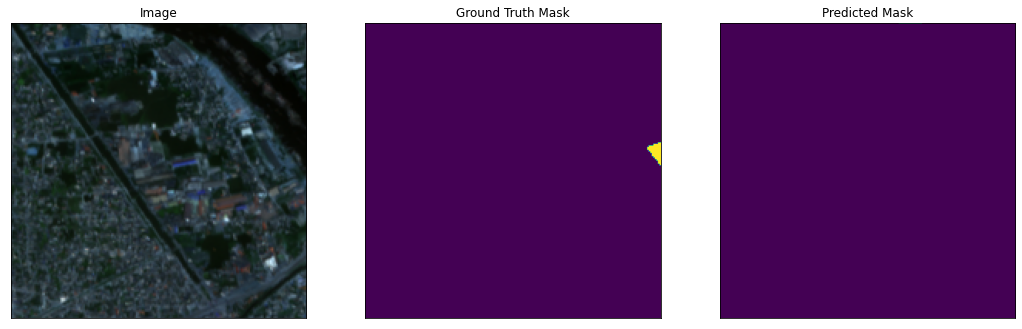

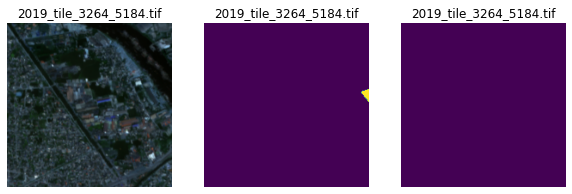

In [36]:
for i in range(20):
    #n = np.random.choice(len(test_dataset))
    n=i
    #n=23
    image_vis = test_dataset_vis[n][0].astype('uint8')
    image, gt_mask = test_dataset[n]
    tempimage, tempgt_mask = test_temp_dataset[n]
    
    gt_mask = gt_mask.squeeze()
    
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = best_model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
    
    
    test_visualize(
            image=image_vis, 
        ground_truth_mask=gt_mask, 
        predicted_mask=pr_mask
    ) 
    test_visualizeandsave(
        
        image = image_vis,
        ground_truth= gt_mask,
        predicted_mask=pr_mask,
        ids=testids[n]
    )

In [37]:

for i in range(len(epochnum)):
    print("Epoch ",i," trainacc ",trainaccuracy[i]," trainiou ",trainiouscores[i]," traindice ",traindiceloss[i]," trainfscore ",trainfscore[i]," trainprecisions ",trainprecisions[i]," trainrecall ",trainrecalls[i],"\n")

Epoch  0  trainacc  0.6592018485069275  trainiou  0.05694714970886707  traindice  0.11322235415379206  trainfscore  0.10683156698942184  trainprecisions  0.062056082114577284  trainrecall  0.4624796807765962 

Epoch  1  trainacc  0.7841896375020344  trainiou  0.10187150469670693  traindice  0.0814501295487086  trainfscore  0.1743808706601461  trainprecisions  0.11121182485173145  trainrecall  0.47265502214431765 

Epoch  2  trainacc  0.8396222313245137  trainiou  0.11485933605581523  traindice  0.06300012866655985  trainfscore  0.1905277002602816  trainprecisions  0.131842881689469  trainrecall  0.42253469427426654 

Epoch  3  trainacc  0.8895078380902608  trainiou  0.13358328665296235  traindice  0.04607397913932801  trainfscore  0.2219121550520261  trainprecisions  0.16610754902164143  trainrecall  0.3844798962275187 

Epoch  4  trainacc  0.921371348698934  trainiou  0.16369726378470656  traindice  0.03205802651743094  trainfscore  0.25469728795190655  trainprecisions  0.218099919892

In [38]:
trainiouscores=[]
traindiceloss=[]
trainfscore=[]
trainprecisions=[]
trainrecalls=[]
trainaccuracy=[]